<a href="https://colab.research.google.com/github/Alex6430/Teory_Information/blob/master/ADS_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Анализ данных по синестезии

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Ankety-sample.xlsx", skiprows=3, header=1, index_col=0)

In [3]:
df.head()

,Дата,utm_1,utm_2,utm_3,Дата рождения,Пол,"Когда Вы видите, слышите или представляете какую-либо букву или цифру, то это вызывает у Вас ощущение цвета, вкуса, фактуры и т.д.","Названия дней недели (понедельник, вторник и т.д.) или месяцев (январь, февраль и т.д.) вызывают ли у Вас ощущение цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде последовательности, располагающейся в трехмерном пространстве?","Звучание отдельных звуков, аккордов или мелодий, сыгранных на определенном музыкальном инструменте, вызывают ли у Вас ощущения цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде отдельных качеств человека (добродушный, щедрый и т.д.) или в виде целой личности (веселый лысый старик, стремительная женщина и т.д.)?","Испытывая боль (например, головную), эмоции (сожаление или печаль) или оргазм, Вы переживаете ощущение цвета, вкуса или аромата?",При непосредственном взгляде на человека или при мысли о нем Вы ощущаете определенный цвет или целую гамму разных оттенков?,"Прикосновение разного характера к различным частям Вашего тела сопровождается для Вас ощущением цвета. Например, при прикосновении к холодной или теплой воде Вы испытываете ощущение различной цветовой гаммы?","Определенный звук вызывает у Вас отчетливое ощущение вкуса, запаха или прикосновения. Например, при звуке тикающих часов у Вас во рту возникает кисловатый привкус или при звуке пролетающего самолета у Вас возникает отчетливое ощущение прикосновения?","При взгляде на картину, обстановку или определенное расположение предметов у Вас возникает отчетливое ощущение вкуса во рту, запаха или звука?"
#,,,,,,,,,,,,,,,,
8130220,2019-03-06 15:43:00,NaN,NaN,NaN,2019-03-08,M,Нет,Нет,Да,Нет,Нет,Нет,Нет,Нет,Нет,Нет
8071510,2019-02-28 12:35:00,NaN,NaN,NaN,2019-10-01,Ж,Да,Да,Нет,Да,Да,Да,Да,Нет,Да,Да
8056006,2019-02-26 18:30:00,NaN,NaN,NaN,2005-02-01,M,Да,Нет,Да,Да,Нет,Да,Нет,Да,Да,Да
8048214,2019-02-25 21:12:00,NaN,NaN,NaN,2019-06-22,Ж,Да,Да,Да,Нет,Нет,Нет,Да,Нет,Нет,Нет
7983449,2019-02-18 22:08:00,NaN,NaN,NaN,2003-10-20,M,Нет,Нет,Да,Нет,Да,Нет,Нет,Нет,Нет,Нет


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 8130220 to 7669285
Data columns (total 16 columns):
 #   Column                                                                                                                                                                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                        --------------  -----         
 0   Дата                                                                                                                                                                                                                                                          25 non-null     datetime64[ns]
 1   utm_1      

In [5]:
yes_no_dict = {'Да': 1, 'Нет': 0}

In [6]:
for column in df.columns[6:]:
    df[column] = df[column].replace(yes_no_dict)

In [7]:
data = df.iloc[:,6:].copy()

In [8]:
data.head()

,"Когда Вы видите, слышите или представляете какую-либо букву или цифру, то это вызывает у Вас ощущение цвета, вкуса, фактуры и т.д.","Названия дней недели (понедельник, вторник и т.д.) или месяцев (январь, февраль и т.д.) вызывают ли у Вас ощущение цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде последовательности, располагающейся в трехмерном пространстве?","Звучание отдельных звуков, аккордов или мелодий, сыгранных на определенном музыкальном инструменте, вызывают ли у Вас ощущения цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде отдельных качеств человека (добродушный, щедрый и т.д.) или в виде целой личности (веселый лысый старик, стремительная женщина и т.д.)?","Испытывая боль (например, головную), эмоции (сожаление или печаль) или оргазм, Вы переживаете ощущение цвета, вкуса или аромата?",При непосредственном взгляде на человека или при мысли о нем Вы ощущаете определенный цвет или целую гамму разных оттенков?,"Прикосновение разного характера к различным частям Вашего тела сопровождается для Вас ощущением цвета. Например, при прикосновении к холодной или теплой воде Вы испытываете ощущение различной цветовой гаммы?","Определенный звук вызывает у Вас отчетливое ощущение вкуса, запаха или прикосновения. Например, при звуке тикающих часов у Вас во рту возникает кисловатый привкус или при звуке пролетающего самолета у Вас возникает отчетливое ощущение прикосновения?","При взгляде на картину, обстановку или определенное расположение предметов у Вас возникает отчетливое ощущение вкуса во рту, запаха или звука?"
#,,,,,,,,,,
8130220,0,0,1,0,0,0,0,0,0,0
8071510,1,1,0,1,1,1,1,0,1,1
8056006,1,0,1,1,0,1,0,1,1,1
8048214,1,1,1,0,0,0,1,0,0,0
7983449,0,0,1,0,1,0,0,0,0,0


In [9]:
data.shape

(25, 10)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
target = kmeans.fit_predict(data)

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(data, target)

0.2910837908608922

In [12]:
all_silh = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    target = kmeans.fit_predict(data)
    all_silh.append(silhouette_score(data, target))

In [13]:
all_silh

[0.3571576807153771,
 0.2665237551526321,
 0.2903912673924539,
 0.29110168117951973,
 0.29888382366563654,
 0.34459595798628856,
 0.3811503987442269,
 0.40352024251243945,
 0.44433430108846816,
 0.4706782338335397,
 0.4706782338335397,
 0.49213845170340953,
 0.5166692700966292,
 0.4806748934749823,
 0.5146737479860428,
 0.4803374467374911,
 0.46862171798495306,
 0.44]

In [14]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
data_2d = pca_2.fit_transform(data)
pca_2.explained_variance_ratio_

array([0.44063142, 0.15449109])

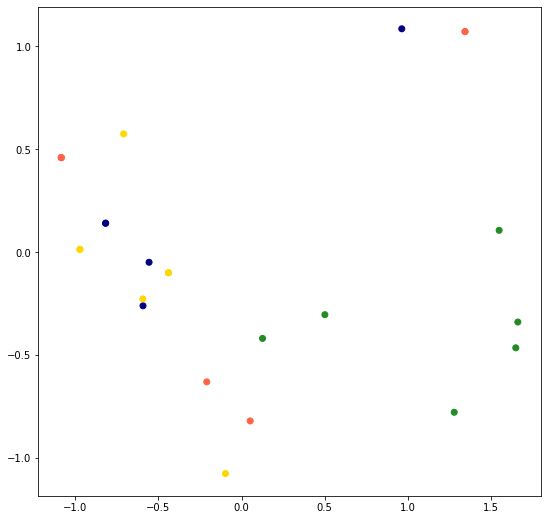

In [15]:
import matplotlib
from matplotlib import pyplot as plt

kmeans = KMeans(n_clusters=13, n_init=10)
target_2d = kmeans.fit_predict(data)

colors = ['tomato', 'forestgreen', 'navy', 'gold']

plt.figure(figsize=(9,9))
plt.scatter(data_2d[:,0], data_2d[:,1], 
            c=target_2d, 
            cmap=matplotlib.colors.ListedColormap(colors))

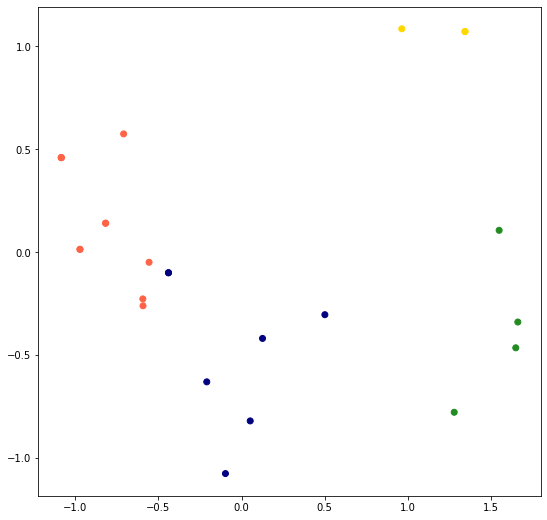

In [16]:
kmeans = KMeans(n_clusters=4, n_init=10)
target_2d = kmeans.fit_predict(data)

colors = ['tomato', 'forestgreen', 'navy', 'gold']

plt.figure(figsize=(9,9))
plt.scatter(data_2d[:,0], data_2d[:,1], 
            c=target_2d, 
            cmap=matplotlib.colors.ListedColormap(colors))

In [17]:
pca_3 = PCA(n_components=3)
data_3d = pca_3.fit_transform(data)
pca_3.explained_variance_ratio_

array([0.44063142, 0.15449109, 0.12726717])

#### Визуализация различных групп в 3D

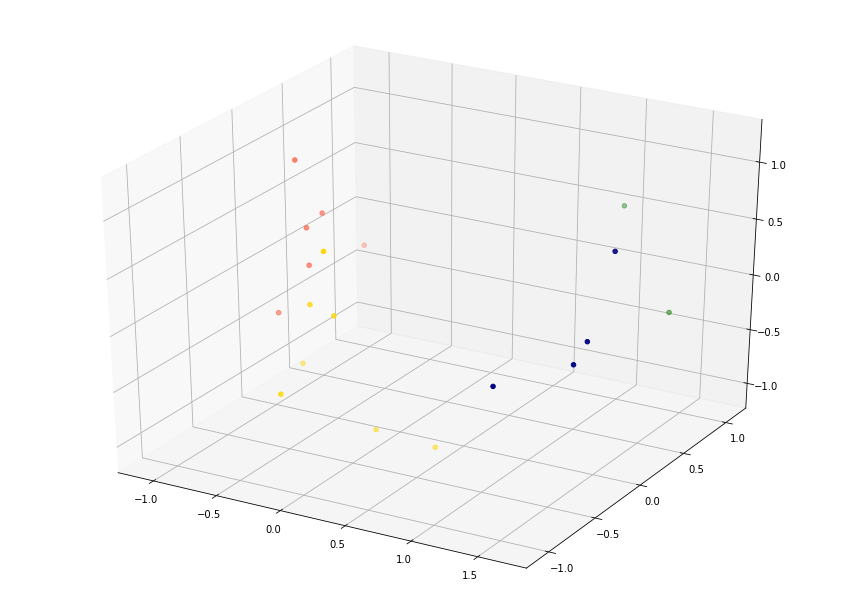

In [18]:
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=4, n_init=10)
target_3d = kmeans.fit_predict(data)

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2],
           c=target_3d, 
           cmap=matplotlib.colors.ListedColormap(colors))

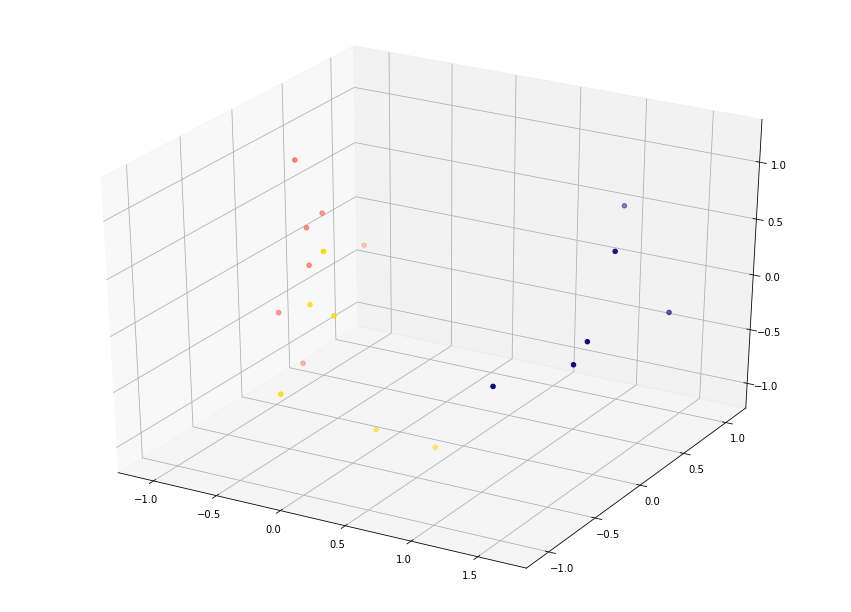

In [19]:
kmeans = KMeans(n_clusters=3, n_init=10)
target_3d = kmeans.fit_predict(data)

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2],
           c=target_3d, 
           cmap=matplotlib.colors.ListedColormap(colors))

### Анализ групп людей

Первая группа имеет ярко выраженную __временную__ синестезию - реакцию на числа/промежутки времени. 

In [20]:
data.iloc[np.where(target_3d==0)[0],:]

,"Когда Вы видите, слышите или представляете какую-либо букву или цифру, то это вызывает у Вас ощущение цвета, вкуса, фактуры и т.д.","Названия дней недели (понедельник, вторник и т.д.) или месяцев (январь, февраль и т.д.) вызывают ли у Вас ощущение цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде последовательности, располагающейся в трехмерном пространстве?","Звучание отдельных звуков, аккордов или мелодий, сыгранных на определенном музыкальном инструменте, вызывают ли у Вас ощущения цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде отдельных качеств человека (добродушный, щедрый и т.д.) или в виде целой личности (веселый лысый старик, стремительная женщина и т.д.)?","Испытывая боль (например, головную), эмоции (сожаление или печаль) или оргазм, Вы переживаете ощущение цвета, вкуса или аромата?",При непосредственном взгляде на человека или при мысли о нем Вы ощущаете определенный цвет или целую гамму разных оттенков?,"Прикосновение разного характера к различным частям Вашего тела сопровождается для Вас ощущением цвета. Например, при прикосновении к холодной или теплой воде Вы испытываете ощущение различной цветовой гаммы?","Определенный звук вызывает у Вас отчетливое ощущение вкуса, запаха или прикосновения. Например, при звуке тикающих часов у Вас во рту возникает кисловатый привкус или при звуке пролетающего самолета у Вас возникает отчетливое ощущение прикосновения?","При взгляде на картину, обстановку или определенное расположение предметов у Вас возникает отчетливое ощущение вкуса во рту, запаха или звука?"
#,,,,,,,,,,
8130220,0,0,1,0,0,0,0,0,0,0
7983449,0,0,1,0,1,0,0,0,0,0
7982616,0,0,1,0,0,0,0,0,0,0
7902198,0,0,0,0,0,0,0,0,0,0
7875302,0,1,1,0,0,0,0,0,0,0
7830111,0,1,1,0,0,0,0,0,0,0
7822804,0,0,1,0,0,1,1,0,0,0
7740095,1,0,0,0,0,0,0,0,0,0
7738896,0,0,1,0,0,0,0,0,0,0


Во второй группе сосредоточены разнообразные __цветовые__ реакции, для вычленения более точного паттерна недостаточно данных. Возможно, какие-то особенности зрительной коры, не связанные с источником стимула.

In [21]:
data.iloc[np.where(target_3d==1)[0],:]

,"Когда Вы видите, слышите или представляете какую-либо букву или цифру, то это вызывает у Вас ощущение цвета, вкуса, фактуры и т.д.","Названия дней недели (понедельник, вторник и т.д.) или месяцев (январь, февраль и т.д.) вызывают ли у Вас ощущение цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде последовательности, располагающейся в трехмерном пространстве?","Звучание отдельных звуков, аккордов или мелодий, сыгранных на определенном музыкальном инструменте, вызывают ли у Вас ощущения цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде отдельных качеств человека (добродушный, щедрый и т.д.) или в виде целой личности (веселый лысый старик, стремительная женщина и т.д.)?","Испытывая боль (например, головную), эмоции (сожаление или печаль) или оргазм, Вы переживаете ощущение цвета, вкуса или аромата?",При непосредственном взгляде на человека или при мысли о нем Вы ощущаете определенный цвет или целую гамму разных оттенков?,"Прикосновение разного характера к различным частям Вашего тела сопровождается для Вас ощущением цвета. Например, при прикосновении к холодной или теплой воде Вы испытываете ощущение различной цветовой гаммы?","Определенный звук вызывает у Вас отчетливое ощущение вкуса, запаха или прикосновения. Например, при звуке тикающих часов у Вас во рту возникает кисловатый привкус или при звуке пролетающего самолета у Вас возникает отчетливое ощущение прикосновения?","При взгляде на картину, обстановку или определенное расположение предметов у Вас возникает отчетливое ощущение вкуса во рту, запаха или звука?"
#,,,,,,,,,,
8071510,1,1,0,1,1,1,1,0,1,1
8056006,1,0,1,1,0,1,0,1,1,1
7983378,1,1,1,1,1,1,1,1,0,1
7960012,1,1,0,1,1,1,1,0,1,0
7882868,1,1,0,1,1,1,1,1,0,1
7844642,1,1,1,1,1,0,0,1,1,1
7810362,1,1,1,1,1,0,0,1,1,1


Третья группа реагирует с помощью цветовых ощущений на __символы__ - буквы, цифры, названия. Возможно, _понятийная синестезия_.

In [22]:
data.iloc[np.where(target_3d==2)[0],:]

,"Когда Вы видите, слышите или представляете какую-либо букву или цифру, то это вызывает у Вас ощущение цвета, вкуса, фактуры и т.д.","Названия дней недели (понедельник, вторник и т.д.) или месяцев (январь, февраль и т.д.) вызывают ли у Вас ощущение цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде последовательности, располагающейся в трехмерном пространстве?","Звучание отдельных звуков, аккордов или мелодий, сыгранных на определенном музыкальном инструменте, вызывают ли у Вас ощущения цвета?","Числа, буквы и/или названия интервалов времени, такие как дни недели и месяцы, мысленно представляются ли Вам в виде отдельных качеств человека (добродушный, щедрый и т.д.) или в виде целой личности (веселый лысый старик, стремительная женщина и т.д.)?","Испытывая боль (например, головную), эмоции (сожаление или печаль) или оргазм, Вы переживаете ощущение цвета, вкуса или аромата?",При непосредственном взгляде на человека или при мысли о нем Вы ощущаете определенный цвет или целую гамму разных оттенков?,"Прикосновение разного характера к различным частям Вашего тела сопровождается для Вас ощущением цвета. Например, при прикосновении к холодной или теплой воде Вы испытываете ощущение различной цветовой гаммы?","Определенный звук вызывает у Вас отчетливое ощущение вкуса, запаха или прикосновения. Например, при звуке тикающих часов у Вас во рту возникает кисловатый привкус или при звуке пролетающего самолета у Вас возникает отчетливое ощущение прикосновения?","При взгляде на картину, обстановку или определенное расположение предметов у Вас возникает отчетливое ощущение вкуса во рту, запаха или звука?"
#,,,,,,,,,,
8048214,1,1,1,0,0,0,1,0,0,0
7884705,1,1,1,0,0,0,0,0,0,0
7805935,1,1,1,0,0,1,1,0,0,0
7794496,1,1,0,1,0,0,0,0,0,0
7761285,1,1,1,0,0,0,0,0,0,0
7757470,1,1,0,0,0,0,1,0,0,0
7738845,1,1,0,1,1,0,0,0,0,0


### Комментарии

Многие реакции проявляются одинаково независимо от источника стимула (слух, зрение, осязание), что может подтверждать гипотезу отсутствия привязки типа реакции к типу возбуждения.